# <span style="color:blue"> MBA em Ciência de Dados</span>
# <span style="color:blue">Técnicas Avançadas para Captura e Tratamento de Dados</span>

## <span style="color:blue">Análise de Componentes Principais -  Avaliação</span>
**Material Produzido por Luis Gustavo Nonato**<br>
**Cemeai - ICMC/USP São Carlos**
---

Os exercícios abaixo farão uso do conjunto de dados <font style="font-family: monaco">blobs2.csv</font> disponível no _moodle_. Na instanciação do PCA utilize o parâmetro: svd_solver='full'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Exercício 1)
Calcule as direções principais dos dados contidos no arquivo <font style="font-family: monaco">blobs2.csv</font>. Qual a quantidade (porcentagem) de variância explicada pela direção principal de maior variância?

a) 17%<br>
b) 22%<br>
c) 35% <br>
d) 42%


In [13]:
# RESPOSTA = B

In [44]:
# Solucao
from sklearn.decomposition import PCA

X = pd.read_csv('blobs2.csv').values
print(X.shape)

pca_obj=PCA(svd_solver='full')
X_transformed = pca_obj.fit(X)

nr_componentes = 3
for i in range(X_transformed.explained_variance_ratio_.shape[0]):
    if i > nr_componentes-1:
        break
    else:
        perc_exp = X_transformed.explained_variance_ratio_[i]
        print(round(perc_exp*100,2),'%')


(600, 25)
22.17 %
18.94 %
18.27 %


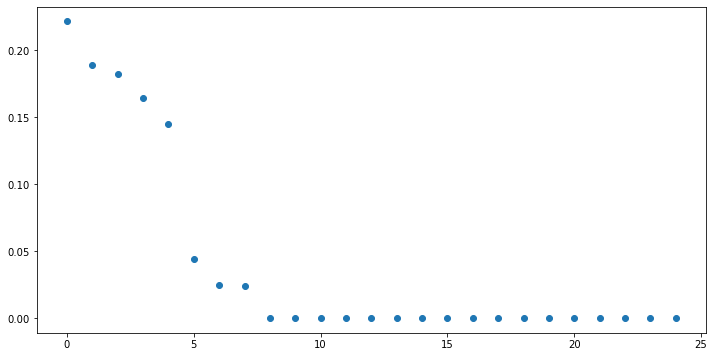

In [15]:
plt.rcParams['figure.figsize'] = [12, 6]
f, (ax1)  = plt.subplots(1)

ax1.plot(X_transformed.explained_variance_ratio_, 'o')

### Exercício 2)
Qual o número mínimo de direções principais necessárias para representar $75\%$ da variância contida nos dados?

a) 4<br>
b) 5<br>
c) 6<br>
d) 7

In [31]:
# RESPOSTA = A

In [36]:
# Solucao
percentage_info = 0
n_componentes_75 = 0
for i in range(X_transformed.explained_variance_ratio_.shape[0]):
    percentage_info += X_transformed.explained_variance_ratio_[i]
    if percentage_info > 0.75:
        n_componentes_75 = i+1
        break

print('Número de componentes necessários :', '%.1f' % n_componentes_75)

Número de componentes necessários : 4.0


### Exercício 3)
Existem _outliers_ nos dados originais. Utilize z-score com um threshold de 2.8 para identificar os outliers e removê-los dos dados. Quantos outliers foram identificados?

a) 3<br>
b) 4<br>
c) 5<br>
d) 6

In [38]:
# RESPOSTA = C

In [76]:
# Solucao
from scipy.stats import zscore

# calculando z-scores
Xzscore = zscore(X,axis=0)

# encontrando outliers
outliers = np.abs(Xzscore) > 2.8 # 2.8 é o threshold utilizado para 
                                 # identificar um valor como outlier
                                
outliers_id = np.argwhere(outliers == True)
print('indice das linhas dos elementos "outliers":\n',outliers_id[:,0])
print('Número de elementos "outliers":\n',len(outliers_id[:,0]))

# removendo outliers
df = pd.DataFrame(data=X)
print(df.shape)
df = df.drop(outliers_id[:,0],axis=0)
print(df.shape)

X_no_outliers = df.values


indice das linhas dos elementos "outliers":
 [116 240 286 298 398]
Número de elementos "outliers":
 5
(600, 25)
(595, 25)


### Exercício 4)
Qual a variância representada pelas três primeiras componentes principais após a remoção dos outliers?

a) aproximadamente 90% <br>
b) aproximadamente 97% <br>
c) aproximadamente 80% <br>
d) aproximadamente 75% 

In [51]:
# RESPOSTA = B

In [77]:
# Solução
pca_obj=PCA(svd_solver='full')
X_no_outliers_transformed = pca_obj.fit(X_no_outliers)

nr_componentes = 3
percentage_info = 0
for i in range(X_no_outliers_transformed.explained_variance_ratio_.shape[0]):
    if i > nr_componentes-1:
        break
    else:
        perc_exp = X_no_outliers_transformed.explained_variance_ratio_[i]
        percentage_info += perc_exp
        print(round(perc_exp*100,2),'%')

print('Soma da informação com 3 componentes :', '%.2f' % round(percentage_info*100,2))

40.8 %
34.47 %
21.68 %
Soma da informação com 3 componentes : 96.95


### Exercício 5)
Projete os dados com e sem outliers nas duas primeiras direções principais. Quantos clusters você consegue visualizar na projeção dos dados com e sem outliers, respectivamente?

a) 1 e 4<br>
b) 6 e 5<br>
c) 4 e 4<br>
d) 3 e 4.


In [60]:
# RESPOSTA = C

Text(0.5, 1.0, 'Sem Outliers')

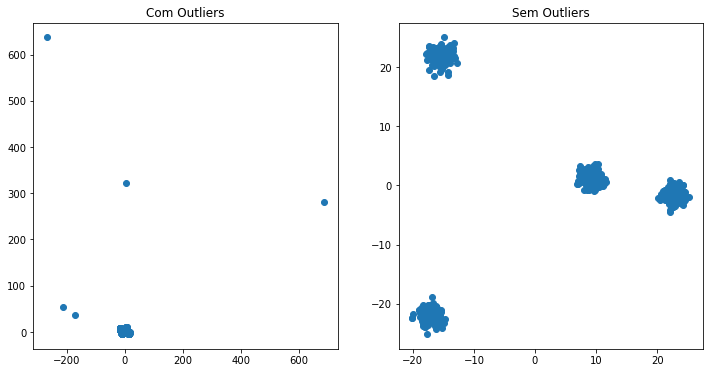

In [78]:
# Solucao
x2d_outlier = np.dot(X,X_transformed.components_[0:2].T)
x2d_no_outliers = np.dot(X_no_outliers,X_no_outliers_transformed.components_[0:2].T)

plt.rcParams['figure.figsize'] = [12, 6]
f, (ax1, ax2)  = plt.subplots(1,2)

ax1.scatter(x2d_outlier[:,0],x2d_outlier[:,1])
ax1.set_title('Com Outliers')
ax2.scatter(x2d_no_outliers[:,0],x2d_no_outliers[:,1])
ax2.set_title('Sem Outliers')